In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
# load data
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   State                                                9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [14]:
# Select relevant columns for clustering
columns_for_clustering = df.iloc[:, 3:]  # Selecting columns from 'MURDER' to 'TOTAL IPC CRIMES'

In [15]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_for_clustering)

In [16]:
# Determine the number of clusters (you can experiment with different values)
num_clusters = 3

In [18]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [20]:
# Analyze the clusters
cluster_analysis = df.groupby('Cluster').mean()

In [21]:
# Map clusters to categories
cluster_categories = {
    0: 'Peaceful Area\'s',
    1: 'Moderate Area\'s',
    2: 'Sensitive Area\'s'
}

In [22]:
df['Cluster'] = df['Cluster'].map(cluster_categories)

In [24]:
# Print the count of districts in each cluster
print(df['Cluster'].value_counts())

Sensitive Area's    8805
Peaceful Area's      136
Moderate Area's       76
Name: Cluster, dtype: int64


In [27]:
# Convert cluster labels to numerical values
cluster_colors = {'Peaceful Area\'s': 'blue', 'Moderate Area\'s': 'green', 'Sensitive Area\'s': 'red'}
df['ClusterColor'] = df['Cluster'].map(cluster_colors)

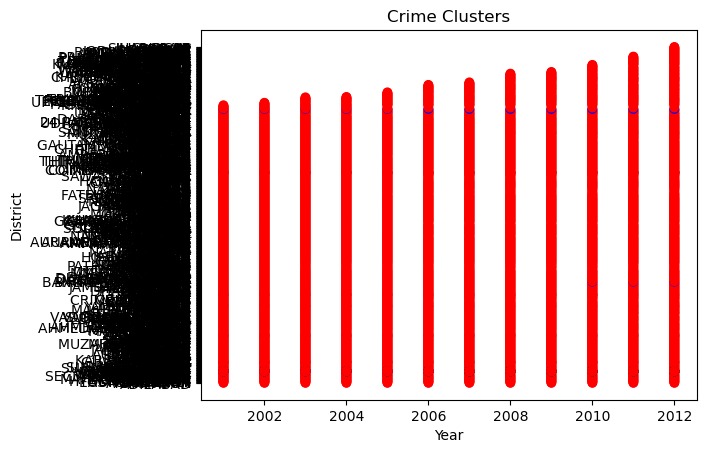

In [28]:
# Visualize the clusters
plt.scatter(df['YEAR'], df['DISTRICT'], c=df['ClusterColor'])
plt.xlabel('Year')
plt.ylabel('District')
plt.title('Crime Clusters')
plt.show()

In [29]:
# Separate DataFrames for each cluster
cluster_0_data = df[df['Cluster'] == 'Peaceful Area\'s']
cluster_1_data = df[df['Cluster'] == 'Moderate Area\'s']
cluster_2_data = df[df['Cluster'] == 'Sensitive Area\'s']

# Display the first few rows of each cluster's DataFrame
print("Cluster 0 Data:")
print(cluster_0_data.head())

print("\nCluster 1 Data:")
print(cluster_1_data.head())

print("\nCluster 2 Data:")
print(cluster_2_data.head())


Cluster 0 Data:
            State DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
70          ASSAM    TOTAL  2001    1356                481   
135  CHHATTISGARH    TOTAL  2001     880                529   
169       GUJARAT    TOTAL  2001    1226                537   
190       HARYANA    TOTAL  2001     781                467   
253     JHARKHAND    TOTAL  2001    1507                866   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
70                                          40   817               0   
135                                         45   959               0   
169                                         94   286               0   
190                                         78   398               0   
253                                        143   567               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
70          817                    1480  ...            59   
135         959                     207  ...    

# Capstone project overall story

In this capstone project, we drill into the world of crime in India. The project is structured into four distinct phases, each focusing on a crucial aspect of data analysis, starting from data collection and preparation, progressing through state-wise analysis, incorporating SQL operations, and concluding with an unsupervised machine learning approach for clustering.
Phase 1: Data Collection/Preparation
The foundation of any data-driven project lies in the quality and relevance of the data collected. In this phase, we embark on a journey to gather essential information, including the population, literacy rate, and area of each state in India. The data is meticulously curated from reliable sources, ensuring a comprehensive dataset for subsequent analyses. This phase also encourages the inclusion of any additional data deemed relevant to enrich the analytical process.

Phase 2: State/UT Wise Analysis
With a well-prepared dataset in hand, we transition to a macroscopic analysis of crimes in India. The focus shifts to state-wise patterns, investigating the intricate relationship between literacy rates and total crimes. Furthermore, the analysis extends to the type of crimes prevalent in each state, year-on-year crime rates, the impact of area on overall crime, and the correlation between population density and crime rates. Each state's crime report is examined, providing a nuanced understanding of the crime landscape across the nation.

Phase 3: SQL Operations
In this phase, the project takes a technical turn, incorporating SQL operations to extract meaningful insights from the data. Separate tables are created for different crime datasets, and queries are formulated to identify states and districts with the highest and lowest occurrences of specific crimes. The focus also extends to identifying trends over the years and discerning patterns in murder cases at both district and state levels. This phase seamlessly integrates SQL operations with data analysis to extract valuable information for decision-makers.

Phase 4: Unsupervised ML (Clustering)
The final phase introduces a sophisticated approach to understanding crime patterns through unsupervised machine learning. Using clustering techniques, the districts across states are categorized into three clusters: Sensitive Areas, Moderate Areas, and Peaceful Areas. Each cluster's characteristics are meticulously analyzed, providing insights into the factors contributing to crime in sensitive areas, potential strategies to reduce crime, and identifying the safest and most unsafe districts. This phase not only showcases the technical prowess of the analysis but also underscores the potential for utilizing machine learning in crime prevention and management.
